In [14]:
from main import DataLoader
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
#%matplotlib notebook

In [4]:
from main import FileHospitalGeneralData
from main import FileHosipitalSpendingNationalData
from main import FilePhysicianData
from main import FilePhysicianNationalData
from main import FilePhysicianGroupMIPSData
from main import FilePhysicianIndivialMIPSData

In [5]:
hospitalgeneraldata=DataLoader.LoadFile(FileHospitalGeneralData)

In [6]:
hospitalgeneraldata.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,010005,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,Acute Care Hospitals,Proprietary,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN
4,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,Acute Care Hospitals,Proprietary,...,Above the national average,NaN,Not Available,16.0,Same as the national average,NaN,Above the national average,NaN,Not Available,5.0


In [7]:
hospitalgeneraldata.columns

Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
       'Readmission national comparison footnote',
       'Patient experience national comparison',
       'Patient experience national comparison footnote',
       'Effectiveness of care national comparison',
       'Effectiveness of care national comparison footnote',
       'Timeliness of care national comparison',
       'Timeliness of care national comparison footnote',
       'Efficient use of medical imaging national comparison',
       'Efficient use of medi

In [10]:
hospitalrating=pd.DataFrame(hospitalgeneraldata)
i=0
for index,hospital in hospitalrating.iterrows():
       if  hospital["Hospital overall rating"] == '5':
            #print(hospital["Facility Name"]+ "," + hospital["Hospital Ownership"])
            if (i == 0) :
                fivestarhospitals=pd.DataFrame({"Facility Name": [hospital["Facility Name"]],"Hospital Ownership":[hospital["Hospital Ownership"]]})
            else:
                df=pd.DataFrame({"Facility Name": [hospital["Facility Name"]],"Hospital Ownership":[hospital["Hospital Ownership"]]})
                fivestarhospitals=fivestarhospitals.append(df,verify_integrity=False, sort=False,ignore_index=True)
            i = i+1
        #print(str(hospital['Hospital overall rating']))

In [11]:
fivestarhospitals

,Facility Name,Hospital Ownership
0,FAYETTE MEDICAL CENTER,Voluntary non-profit - Other
1,SOUTH BALDWIN REGIONAL MEDICAL CENTER,Proprietary
2,PRATTVILLE BAPTIST HOSPITAL,Government - Hospital District or Authority
3,LAKELAND COMMUNITY HOSPITAL,Voluntary non-profit - Church
4,BAPTIST MEDICAL CENTER EAST,Government - Hospital District or Authority
...,...,...
402,TEXAS HEALTH PRESBYTERIAN HOSPITAL ROCKWALL,Proprietary
403,SOUTH TEXAS SURGICAL HOSPITAL,Proprietary
404,TEXAS HEALTH HEART & VASCULAR HOSPITAL ARLINGTON,Proprietary
405,BAPTIST EMERGENCY HOSPITAL,Proprietary


In [12]:
FSOwnershipCount=pd.DataFrame(fivestarhospitals.groupby("Hospital Ownership").count())
FSOwnershipCount

,Facility Name
Hospital Ownership,
Government - Hospital District or Authority,21
Government - Local,15
Government - State,3
Physician,11
Proprietary,45
Voluntary non-profit - Church,42
Voluntary non-profit - Other,42
Voluntary non-profit - Private,228


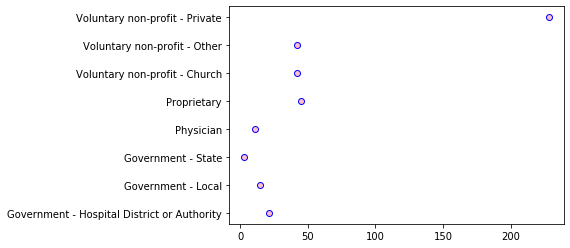

In [15]:
plt.scatter(FSOwnershipCount['Facility Name'],FSOwnershipCount.index,marker="o",color="pink",edgecolor="blue")